# Retail Customer Analysis Summative Lab
## Understanding Customer Behavior Across Store Locations

### Introduction

This summative lab bridges the concepts and techniques learned throughout the course with their practical application to a real-world industry scenario. You will step into the role of a junior data analyst for a retail company and apply your skills to evaluate customer behavior, satisfaction, and promotional impacts. By following the outlined process, you will gain experience in experimental design, statistical testing, and actionable decision-making.

Your task is not only to conduct the analysis but also to reflect on how these techniques help solve real-world problems that businesses face daily.

By completing this lab, you will have:
- Practiced designing and executing statistical analyses in a real-world scenario.
- Reinforced your understanding of test selection and assumptions.
- Applied statistical results to business decision-making.
- Developed skills in communicating insights effectively through visualizations and reports.

### Business Scenario Questions:
Imagine you are a junior data analyst working for a retail company that operates stores in three distinct regions: City Center, Suburb, and Rural. Your manager has tasked you with analyzing customer behavior and preferences across these locations. The goal is to help the company answer two key questions:
1. Do customer spending patterns, satisfaction levels, and product preferences differ across store locations?
2. Do promotional periods result in significantly higher spending compared to non-promotional periods?

Spending Across Location:

- Business-relevant MDE: Absolute difference in spending of 15% or more
- Justification: This represents enough of a difference to warrant location-specific strategies (inventory, staffing, etc.)


Ratings Across Locations:

- Business-relevant MDE: 1.0 point difference between locations
- Justification: On a 10-point scale, a one point difference is noticeable and actionable for customer service improvements

Promotional Spending:

- Business-relevant MDE: A $15 increase from non-promotional periods
- Justification: Promotional costs typically reduce margins by ~15-20%. Need at least 25% increase in spending to justify promotional costs. This aligns with industry standards for promotional ROI

Your task involves designing and conducting an analysis using the provided dataset to derive actionable insights. You will apply statistical concepts and techniques such as experimental design, test selection, hypothesis testing, and result interpretation. This process mimics real-world industry scenarios where junior analysts evaluate business performance using data.

The data focuses on four variables:
- Amount spent by customers (in dollars)
- Customer satisfaction ratings (scale of 1 to 10)
- Product category preferences (Electronics, Clothing, Groceries)
- Purchase type (Promotional vs. Non-Promotional)

Your analysis will inform decision-making around marketing strategies, store operations, and promotional campaigns.

### Setup

In this cell, import all the libraries you'll need for your analysis. Consider which libraries you'll need for:
- Data manipulation
- Statistical analysis
- Data visualization

In [2]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from ydata_profiling import ProfileReport
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro

### Part 1: Experimental Design

#### 1.1 Hypothesis Formulation

For each of the following analyses, state your null and alternative hypotheses in both statistical and plain language:

**Statistical**
1. Spending across store locations

   a. Null hypothesis: There will be no significant difference in spending across locations.

   b. Alternative: Spending will differ across locations.

2. Customer satisfaction across locations

   a. Null hypothesis: There will be no significant differnece in customer satisfaction across locations.

   b. Alternative: Customer satisfaction will differ across locations.

3. Promotional vs non-promotional spending

   a. Null hypothesis: There will be no significant difference between promotional and non-promotional mean spending.

   b. Alternative: Mean promotional spending will be higher than mean non-promotional spending.

4. Product category preferences across locations

   a. Null hypothesis: There will be no significant difference in category representation proportion across locations.

   b. Alternative: Category representation proportion will differ across locations.

**Plainer**
1. Spending across store locations

   a. Null hypothesis: The average amount customers spend is the same at all three store locations (City Center, Suburb, and Rural).

   b. Alternative: The average amount customers spend is different at least for one of the store locations.

2. Customer satisfaction across locations

   a. Null hypothesis: On average, customer satisfaction levels are the same across all three store locations.

   b. Alternative: Different store locations will have different levels of customer satisfaction.

3. Promotional vs non-promotional spending

   a. Null hypothesis: The average amount spent on purchases made with a promotion is the same as the average amount spent on purchases made without a promotion.

   b. Alternative: On average, customers spend more money when they make a purchase using a promotion compared to when they don't.

4. Product category preferences across locations

   a. Null hypothesis: The popularity of different product categories (like Electronics, Groceries, Clothing) is the same regardless of the store location.

   b. Alternative: The types of products customers prefer to buy differ depending on the store location.

**Reflective Question: Explain the concept of Minimum Detectable Effect (MDE) and why it is important.**

[Write your answer here]

### Part 2: Data Exploration

#### 2.1 Load and Examine the Dataset

Load the dataset and perform initial data quality checks:
- Check for missing values
- Examine data types
- Look for inconsistencies
- Generate summary statistics

In [3]:
# Load Data
data = pd.read_csv("retail_store_customer_data.csv")
data["Product_Category"].value_counts()

# Initial EDA - Create new cells as needed
#data.head()
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 149.09it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
profile = ProfileReport(data, minimal=True)
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00, 12.62it/s]


#### 2.2 Data Visualization

Create visualizations to understand the distribution of key variables:
- Spending patterns across locations
- Satisfaction ratings distribution
- Product category preferences
- Promotional vs non-promotional spending

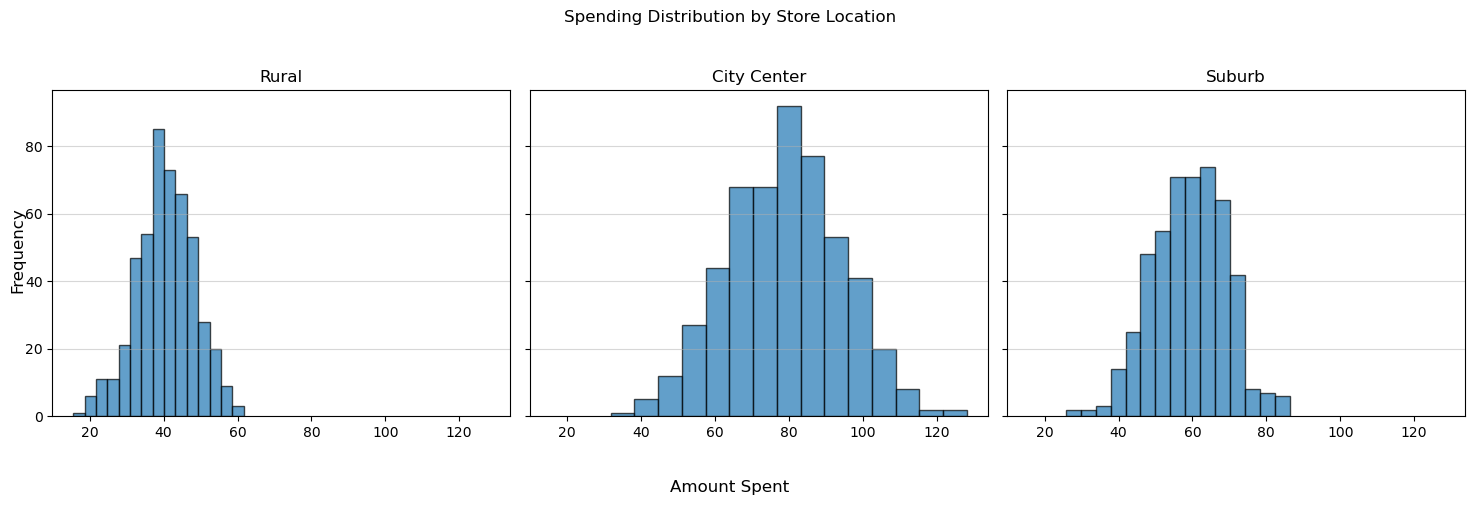

In [ ]:
# Visualize data - Create new cells as needed
# Asked Gemini to create histograms with shared axes labels because my original was visually repetitive and not scaled
# Get unique store locations
locations = data['Store_Location'].unique()

# Create figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, location in enumerate(locations):
    location_data = data[data['Store_Location'] == location]['Amount_Spent']
    axes[i].hist(location_data, bins=15, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{location}')
    axes[i].grid(axis='y', alpha=0.5)

# Set common labels for the entire figure
fig.supxlabel('Amount Spent')
fig.supylabel('Frequency')
fig.suptitle('Spending Distribution by Store Location')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()

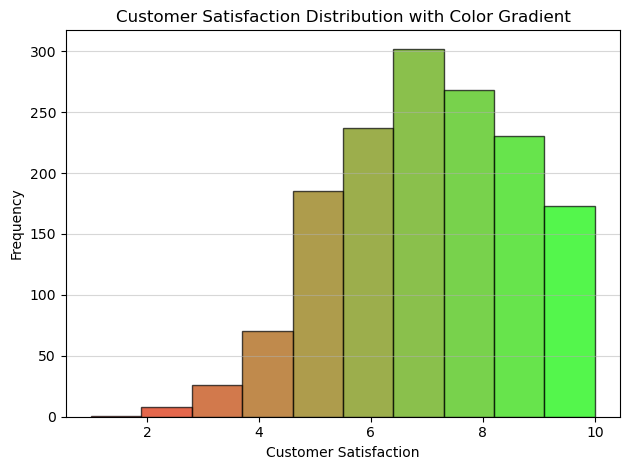

In [24]:
# Asked Gemini for a color gradient histogram
from matplotlib.colors import LinearSegmentedColormap
# Customer satisfaction data
satisfaction = data['Customer_Satisfaction']

# Define the colormap: red to green
colors = [(1, 0, 0), (0, 1, 0)]  # Red at index 0, Green at index 1
cmap_name = 'red_to_green'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

# Create the histogram
fig, ax = plt.subplots() # Create a figure and an axes object
n, bins, patches = ax.hist(satisfaction, bins=10, edgecolor='black', alpha=0.7)

# Normalize bin centers to the range [0, 1] for the colormap
bin_centers = 0.5 * (bins[:-1] + bins[1:])
norm = plt.Normalize(vmin=1, vmax=10)
scalarMap = plt.cm.ScalarMappable(norm=norm, cmap=cm)
scalarMap.set_array([]) # Important: Need to set an array for the mappable

# Color the bars based on the normalized bin centers
for i, patch in enumerate(patches):
    colorVal = scalarMap.to_rgba(bin_centers[i])
    patch.set_facecolor(colorVal)

ax.set_title('Customer Satisfaction Distribution with Color Gradient')
ax.set_xlabel('Customer Satisfaction')
ax.set_ylabel('Frequency')
ax.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

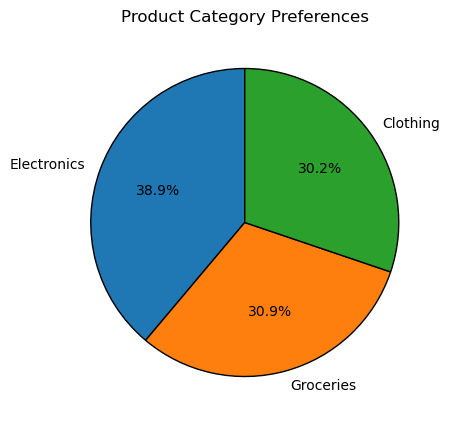

In [ ]:
category_counts = data["Product_Category"].value_counts()

categories = category_counts.index.tolist()
counts = category_counts.values.tolist()

plt.figure(figsize=(5, 5))
plt.pie(counts, labels=categories, autopct="%1.1f%%", startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Product Category Preferences")
plt.show()

In [ ]:
#TODO visualization for promo vs non-promo? Seems like a table would be fine

#### 2.3 Test Assumptions

Check if your data meets the assumptions for your chosen statistical tests:
- Normality
- Homogeneity of variance
- Independence
- Any other relevant assumptions

In [4]:
# Assumption tests and checks - Create new cells as needed

# Test spending distribution meets criteria 
# 1. Spending Across Store Locations (check normality per location)
print("--- Shapiro-Wilk Test for Spending Normality ---")
for location in data["Store_Location"].unique():
    spending_data = data[data["Store_Location"] == location]["Amount_Spent"]
    stat, p = shapiro(spending_data)
    print(f"Location: {location}")
    print(f"  Shapiro-Wilk Statistic: {stat:.3f}")
    print(f"  P-value: {p:.3f}")
    if p > 0.05:
        print("  Expectation: Data is likely normally distributed (fail to reject null hypothesis).")
    else:
        print("  Expectation: Data is likely not normally distributed (reject null hypothesis).")
    print("-" * 30)

# 2. Customer Satisfaction Across Locations (check normality per location)
print("\n--- Shapiro-Wilk Test for Customer Satisfaction Normality ---")
for location in data["Store_Location"].unique():
    satisfaction_data = data[data["Store_Location"] == location]["Customer_Satisfaction"]
    stat, p = shapiro(satisfaction_data)
    print(f"Location: {location}")
    print(f"  Shapiro-Wilk Statistic: {stat:.3f}")
    print(f"  P-value: {p:.3f}")
    if p > 0.05:
        print("  Expectation: Data is likely normally distributed (fail to reject null hypothesis).")
    else:
        print("  Expectation: Data is likely not normally distributed (reject null hypothesis).")
    print("-" * 30)

# 3. Promotional vs. Non-Promotional Spending (check normality per purchase type)
print("\n--- Shapiro-Wilk Test for Spending Normality by Purchase Type ---")
for purchase_type in data["Purchase_Type"].unique():
    spending_data = data[data["Purchase_Type"] == purchase_type]["Amount_Spent"]
    stat, p = shapiro(spending_data)
    print(f"Purchase Type: {purchase_type}")
    print(f"  Shapiro-Wilk Statistic: {stat:.3f}")
    print(f"  P-value: {p:.3f}")
    if p > 0.05:
        print("  Expectation: Data is likely normally distributed (fail to reject null hypothesis).")
    else:
        print("  Expectation: Data is likely not normally distributed (reject null hypothesis).")
    print("-" * 30)

--- Shapiro-Wilk Test for Spending Normality ---
Location: Rural
  Shapiro-Wilk Statistic: 0.996
  P-value: 0.259
  Expectation: Data is likely normally distributed (fail to reject null hypothesis).
------------------------------
Location: City Center
  Shapiro-Wilk Statistic: 0.998
  P-value: 0.754
  Expectation: Data is likely normally distributed (fail to reject null hypothesis).
------------------------------
Location: Suburb
  Shapiro-Wilk Statistic: 0.994
  P-value: 0.050
  Expectation: Data is likely normally distributed (fail to reject null hypothesis).
------------------------------

--- Shapiro-Wilk Test for Customer Satisfaction Normality ---
Location: Rural
  Shapiro-Wilk Statistic: 0.997
  P-value: 0.373
  Expectation: Data is likely normally distributed (fail to reject null hypothesis).
------------------------------
Location: City Center
  Shapiro-Wilk Statistic: 0.970
  P-value: 0.000
  Expectation: Data is likely not normally distributed (reject null hypothesis).
-----

In [5]:
# Q-Q Plot for Spending in the Suburb Location
suburb_spending = data[data["Store_Location"] == "Suburb"]["Amount_Spent"]

# Create the Q-Q plot
stats.probplot(suburb_spending, dist="norm", plot=plt)
plt.title("Q-Q Plot of Spending in Suburb Location")
plt.xlabel("Theoretical Quantiles (Normal Distribution)")
plt.ylabel("Sample Quantiles (Suburb Spending)")
plt.grid(True)
plt.show()

C:\Users\aaeam\AppData\Local\Temp\ipykernel_27256\1058598476.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


#### 2.4 Choose Appropriate Statistical Tests

Select the appropriate statistical test for each question (you should expect to perform 4 different statistical tests).

1. Spending across store locations
2. Customer satisfaction across locations
3. Promotional vs non-promotional spending
4. Product category preferences across locations

NOTE: Use [Dunn's Test](https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn.html) for Non-Parametric Post-hoc if needed. You might need to pip install scikit-postdoc package. You want to set p_adjust='bonferroni' for Dunn's Test.



**Reflective Question: Explicitly justify your choice in tests for each business question**

[Write your answer here]

### Part 3: Statistical Analysis

Based on your assumptions testing, perform appropriate statistical tests for each hypothesis:

#### 3.1 Spending Across Locations

In [ ]:
# Conduct your analysis of spending patterns here
city_spending = data[data["Store_Location"] == "City Center"]["Amount_Spent"]
suburb_spending = data[data["Store_Location"] == "Suburb"]["Amount_Spent"]
rural_spending = data[data["Store_Location"] == "Rural"]["Amount_Spent"]

f, p = stats.f_oneway(city_spending, suburb_spending, rural_spending)
print(f)
print(p)

#all_data = np.concatenate([city_spending, suburb_spending, rural_spending])
##labels = np.repeat(["City Center", "Suburb", "Rural"])

#tukey = pairwise_tukeyhsd(data["Amount_Spent"], labels)
#tukey.summary()


1386.970461564439
0.0


TypeError: repeat() missing 1 required positional argument: 'repeats'

#### 3.2 Customer Satisfaction Analysis

In [32]:
# Analyze customer satisfaction here
city_rating = data[data["Store_Location"] == "City Center"]["Customer_Satisfaction"]
suburb_rating = data[data["Store_Location"] == "Suburb"]["Customer_Satisfaction"]
rural_rating = data[data["Store_Location"] == "Rural"]["Customer_Satisfaction"]

f, p = stats.f_oneway(city_rating, suburb_rating, rural_rating)
print(f)
print(p)

242.17253721184784
7.566029725941914e-92


#### 3.3 Promotional Impact Analysis

In [34]:
# Analyze the impact of promotions here
promo_spending = data[data["Purchase_Type"] == "Promotional"]["Amount_Spent"]
non_promo_spending = data[data["Purchase_Type"] == "Non-Promotional"]["Amount_Spent"]

#### 3.4 Product Category Analysis

In [ ]:
# Analyze product category preferences here
city_cats = data[data["Store_Location"] == "City Center"]["Product_Category"]
suburb_cats = data[data["Store_Location"] == "Suburb"]["Product_Category"]
rural_cats = data[data["Store_Location"] == "Rural"]["Product_Category"]

### Part 4: Results Interpretation

For each analysis, provide:
1. A clear statement of the statistical results
2. The practical significance of these findings
3. Visualizations that support your conclusions
4. Specific business recommendations

In [ ]:
# Calculate effect sizes - contrast with MDE
None

**Reflective Question: Results - Clearly state whether the null hypotheses were rejected or not. Frame this in the business question context. Use effect sizes (e.g., Cohen’s d, eta squared) to contextualize the significance of your results.**

[Write your answer here]

**Reflective Question: Recommendations - Explain the practical implications of the results. What should the company do based on your findings about spending, satisfaction, or product preferences?**

[Write your answer here]


In [ ]:
# Create visualizations to support results - Create new cells as needed
None

### Part 5: Reflection

Discuss:
1. The strengths and limitations of your analysis
2. Any assumptions or potential biases in the data
3. Suggestions for additional data collection
4. How this analysis could be improved

**Reflective Question: Explain the importance of experimental design and sufficient sample size in conducting a robust analysis. Identify any limitations in the dataset or analysis (e.g., potential biases, unmeasured variables) and suggest additional data the company could collect to improve future analyses.**

[Write your reflection here]